In [2]:
from tools import *
from config import *

exp = "final"
sinister = "firepoint"
resolution = '2x2'

dico = read_object('break_point_dict.pkl', Path(exp + '/' + sinister + '/' + resolution  + '/' + 'train' + '/' + 'varOnValue' + '/' + 'full_10'))
dico

{6: {'name': 'temp_temp_mean',
  'fet': 'temp',
  0: 0.029475766567754698,
  1: 0.09297725024727992,
  2: 0.1970326409495549,
  3: 0.34559841740850644,
  4: 0.3349159248269041,
  'correlation': 0.965771782979572},
 7: {'name': 'temp_temp_min',
  'fet': 'temp',
  0: 0.03086053412462908,
  1: 0.08704253214638971,
  2: 0.1930761622156281,
  3: 0.34460929772502474,
  4: 0.34441147378832837,
  'correlation': 0.969987031347576},
 8: {'name': 'temp_temp_max',
  'fet': 'temp',
  0: 0.03086053412462908,
  1: 0.09594460929772503,
  2: 0.19446092977250248,
  3: 0.3560830860534125,
  4: 0.32265084075173095,
  'correlation': 0.9500309675274647},
 9: {4: 0.5736894164193868,
  3: 0.2997032640949555,
  2: 0.09990108803165183,
  1: 0.022551928783382788,
  0: 0.004154302670623145,
  'correlation': -0.9349521363884928,
  'name': 'temp_temp_std',
  'fet': 'temp'},
 10: {'name': 'dwpt_dwpt_mean',
  'fet': 'dwpt',
  0: 0.042927794263105834,
  1: 0.14579624134520278,
  2: 0.19841740850642928,
  3: 0.32284866

In [5]:
df = pd.DataFrame.from_dict(dico)
maxi = np.nanmax(df[df.columns].values)
df.reset_index(inplace=True)
df.rename({'index': 'class'}, axis=1, inplace=True)
df

UFuncTypeError: ufunc 'less_equal' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [1]:
def check_for_linear_correlation(df):
    res = {}
    columns_feature = df.columns[1:]

    for cf in columns_feature:
        correlation = abs(df['class'].corr(df[cf]))
        if correlation > 0.7:
            res[cf] = abs(correlation)
            
    print(f'Original len of feature {len(columns_feature)}, selected features {len(res.keys())}')

    return res

correlation = check_for_linear_correlation(df)
correlation

NameError: name 'df' is not defined

<Axes: >

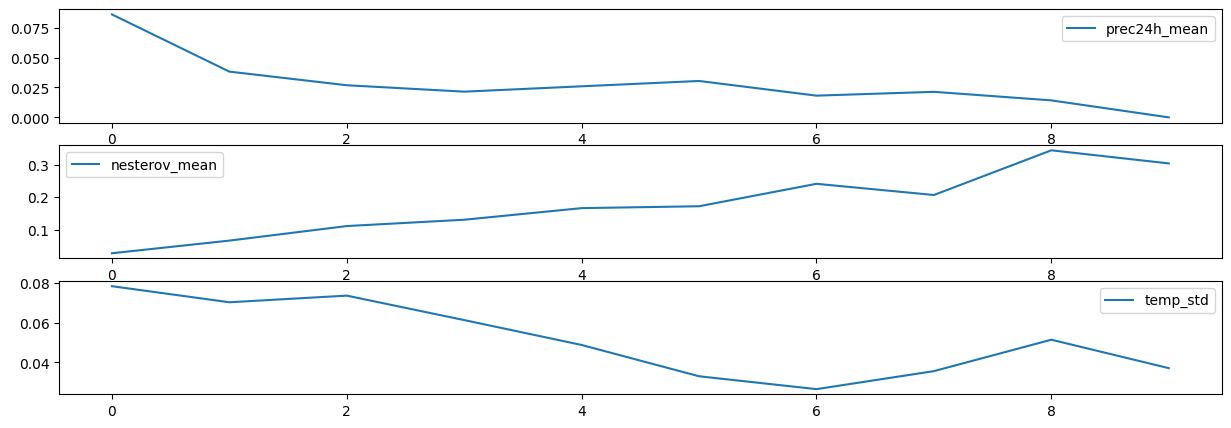

In [68]:
fig, ax = plt.subplots(3, figsize=(15,5))
df[['prec24h_mean']].plot(ax=ax[0])
df[['nesterov_mean']].plot(ax=ax[1])
df[['temp_std']].plot(ax=ax[2])